# check 1 file

In [3]:
import scipy.io as sio
file_name = r'D:\repo\bio_simCLR\demo\COCO_train2014_000000000009.mat'.replace('\\', '/')
data = sio.loadmat(file_name)
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'image', 'resolution', 'gaze'])

In [21]:
# data['gaze']['timestamp'][0][0][:10], \
# data['gaze']['location'][0][0][:10], \
data['gaze']['fixations'][0][0][:10]

array([[330, 302],
       [222, 402],
       [237, 272],
       [233, 156],
       [275,  81],
       [451,  78],
       [587, 181],
       [595, 236],
       [595, 248]], dtype=uint16)

In [26]:
data['gaze']['fixations'][0][0][:].shape

(9, 2)

# check train & val files

70% of images have >= 6 fixations.  
10K train -> 7K train  
5K val -> 3.5K val

In [ ]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

7191

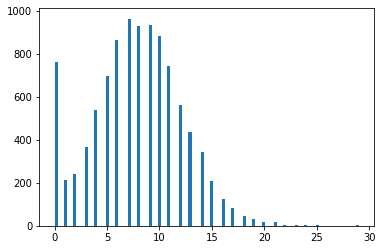

In [33]:
dir_train = r'D:\repo\bio_simCLR\salicon\fixations\train'.replace('\\', '/')
def get_file_names(dir_name):
    import os
    file_names = os.listdir(dir_name)
    return file_names
file_names = get_file_names(dir_train)
file_names = [dir_train + '/' + file_name for file_name in file_names]

# count the number of fixations in each file
def count_fixations(file_name):
    data = sio.loadmat(file_name)
    nfix = data['gaze']['fixations'][0][0].shape[0]
    return nfix
nfix_train = [count_fixations(file_name) for file_name in file_names] # 20 s for 10K files
plt.hist(nfix_train, bins=100);

nfix_train = np.array(nfix_train)
sum(nfix_train >= 6)

3518

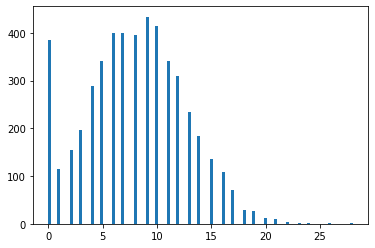

In [31]:
dir_val = r'D:\repo\bio_simCLR\salicon\fixations\val'.replace('\\', '/')
file_names = get_file_names(dir_val)
file_names = [dir_val + '/' + file_name for file_name in file_names]

nfix_val = [count_fixations(file_name) for file_name in file_names] # 10 s for 5K files
plt.hist(nfix_val, bins=100);

nfix_val = np.array(nfix_val)
sum(nfix_val >= 6)